<a href="https://colab.research.google.com/github/PavelStelmakhV/hw309-selection-of-hyperparameters/blob/main/hw309.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
%load_ext tensorboard

import datetime
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from keras import layers
from keras import callbacks

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical


# import numpy as np
# import matplotlib.pyplot as plt
# import tf_keras

# from keras import layers
# from keras import models
# from keras import regularizers
# from keras import callbacks
# from keras import initializers

# from keras.layers import BatchNormalization
# from keras.models import load_model


In [69]:
num_classes = 10
!rm -rf ./logs/

In [70]:
%%capture
%%time
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [71]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [72]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [73]:
x_train.shape[1]

28

In [74]:
# Split the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Standardize the input features
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# Build a simple neural network
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=512, activation='relu'))
model.add(layers.Dropout(0.25))
# model.add(Dense(units=128, activation='relu'))
# model.add(layers.Dropout(0.25))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=6)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
# tb = TensorBoard(log_dir='./logs')

callback_list = [
    EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=6),
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True),
    TensorBoard(TensorBoard(log_dir=log_dir, histogram_freq=1))
    ]

In [76]:
%%time
# Train the model
history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    callbacks=callback_list,
                    validation_split=0.2,
                    verbose=0)

TypeError: expected str, bytes or os.PathLike object, not TensorBoard

In [77]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 2.4818 - accuracy: 0.0799
Test Accuracy: 0.07989999651908875


In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


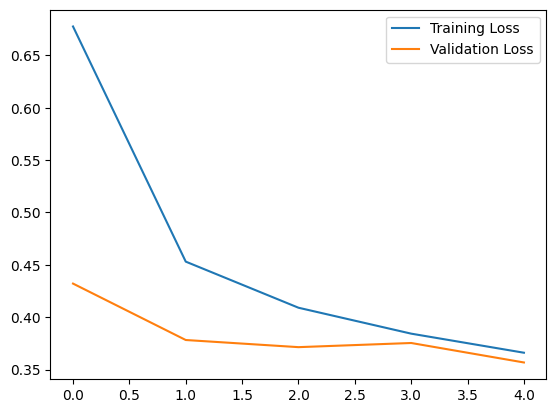

In [79]:

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

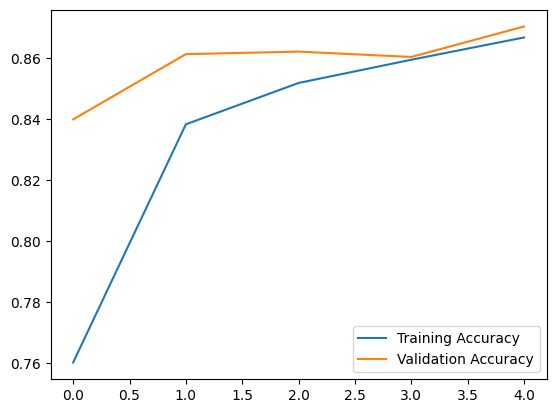

In [80]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [81]:
!tensorboard --logdir logs/fit

2024-05-20 00:06:48.591421: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 00:06:48.591516: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 00:06:48.594814: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-20 00:06:50.139923: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to 